In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
df = pd.read_csv('Kel02.csv')

Berikut adalah data transaksi sebuah minimarket di Univ Stimik Nusa mandiri

In [2]:
df.head() #Melihat 5 sampel data sampel data pada dataset transaksi di minimarket Nuri

,Tanggal,No transaksi,Kode,Ket Barang,Qty,Harga,Tot Harga,Distro,Jenis
0,22/04/18,201801000011,21105030014,MARJAN SYRUP MELON 550ML,6,"19,900","119,400",Hydro,Minuman_01
1,22/04/18,201801000011,12202040056,OISHI RIN-BEE PCK 70G,1,"6,300","6,300",Hydro,Snack
2,22/04/18,201801000011,12202050096,REBO KUACI B.MTHRI MILK 70G,1,"7,000","7,000",Hydro,Snack
3,22/04/18,201801000011,12202050095,REBO KUACI B.MTHRI MILK 70G,2,"7,000","14,000",Hydro,Snack
4,22/04/18,201801000011,12301010008,INACO JELLY ASSORTED 5'S,1,"3,000","3,000",Hydro,Snack


In [3]:
df.shape #Mengecek ada berapa jumlah baris dan kolom pada dataset minimarket Nuri

(129, 9)

In [4]:
df.dtypes

Tanggal         object
No transaksi     int64
Kode             int64
Ket Barang      object
Qty              int64
Harga           object
Tot Harga       object
Distro          object
Jenis           object
dtype: object

In [5]:
df["Tanggal"] = df["Tanggal"].astype('datetime64[ns]')

In [6]:
df.dtypes

Tanggal         datetime64[ns]
No transaksi             int64
Kode                     int64
Ket Barang              object
Qty                      int64
Harga                   object
Tot Harga               object
Distro                  object
Jenis                   object
dtype: object

In [7]:
df.sort_values(by=["Tanggal"]).head()

,Tanggal,No transaksi,Kode,Ket Barang,Qty,Harga,Tot Harga,Distro,Jenis
0,2018-04-22,201801000011,21105030014,MARJAN SYRUP MELON 550ML,6,"19,900","119,400",Hydro,Minuman_01
93,2018-04-22,201801000018,43501030015,ZAHARA JERUK NIPIS 800,1,"14,500","14,500",Hydro,House Hold
92,2018-04-22,201801000018,12302020074,BENG - BENG SHARED IT 285G,1,"26,500","26,500",Hydro,Snack
91,2018-04-22,201801000017,12202040016,DK TIC TAC PEDAS 90G,1,"5,200","5,200",Hydro,Snack
90,2018-04-22,201801000017,12201010057,HELLO PANDA STRAW 45G,1,"8,500","8,500",Hydro,Minuman


In [8]:
print("Menampilkan data ke 5 sampai kurang dari 10 dalam satu baris:")

print(df.iloc[5:10]) #Iloc berfungsi Menampilkan data dalam range tertentu

Menampilkan data ke 5 sampai kurang dari 10 dalam satu baris:
     Tanggal  No transaksi         Kode                  Ket Barang  Qty  \
5 2018-04-22  201801000011  12201090061  ROMA MALKIST COKELAT 120GR    1   
6 2018-04-22  201801000011  12201010067         BISKUAT COKLAT 154G    1   
7 2018-04-22  201801000011  12202010023     RICHEESE AHH TRIPLE 5 G    2   
8 2018-04-22  201801000011  12201090059          BRIO GO!POTATO 60G    1   
9 2018-04-22  201801000011  12002020031              MILO UHT 115ML    1   

   Harga Tot Harga Distro    Jenis  
5  7,500     7,500  Hydro    Snack  
6  9,000     9,000  Hydro    Snack  
7    800     1,600  Hydro    Snack  
8  3,800     3,800  Hydro    Snack  
9  3,300     3,300  Hydro  Minuman  


In [9]:
df.duplicated().sum() #Mengecek apakah ada duplikasi data

0

In [10]:
print(df.isnull().values.any()) #mengecek apakah ada data yang kosong.

False


In [11]:
# Preprocessing
df["Ket Barang"] = df["Ket Barang"].str.strip() # hapus spasi yang tidak perlu
df['Ket Barang'] = df["Ket Barang"].str.lower() # normalisasi huruf kecil
df.dropna(axis=0, subset=["No transaksi"], inplace=True) # hapus baris tanpa No Transaksi
df["No transaksi"] = df["No transaksi"].astype("str") # Ubah tipe data
df["Jenis"] = df["Jenis"].apply(lambda x: x.replace("Minuman_01", "Minuman")) # replace data Minuman_01 Menjadi Minuman
df.head()

,Tanggal,No transaksi,Kode,Ket Barang,Qty,Harga,Tot Harga,Distro,Jenis
0,2018-04-22,201801000011,21105030014,marjan syrup melon 550ml,6,"19,900","119,400",Hydro,Minuman
1,2018-04-22,201801000011,12202040056,oishi rin-bee pck 70g,1,"6,300","6,300",Hydro,Snack
2,2018-04-22,201801000011,12202050096,rebo kuaci b.mthri milk 70g,1,"7,000","7,000",Hydro,Snack
3,2018-04-22,201801000011,12202050095,rebo kuaci b.mthri milk 70g,2,"7,000","14,000",Hydro,Snack
4,2018-04-22,201801000011,12301010008,inaco jelly assorted 5's,1,"3,000","3,000",Hydro,Snack


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Snack'),
  Text(1, 0, 'Minuman'),
  Text(2, 0, 'House Hold'),
  Text(3, 0, 'Permen/Coklat'),
  Text(4, 0, 'Dry Food'),
  Text(5, 0, 'Paper Good'),
  Text(6, 0, 'Bahan Makanan'),
  Text(7, 0, 'Personal Care'),
  Text(8, 0, 'Frozen'),
  Text(9, 0, 'Roti dkk'),
  Text(10, 0, 'Susu'),
  Text(11, 0, 'Obat'),
  Text(12, 0, 'Minyak/Margarin'),
  Text(13, 0, 'Baby'),
  Text(14, 0, 'Oral Hygiene'),
  Text(15, 0, 'Buah')])

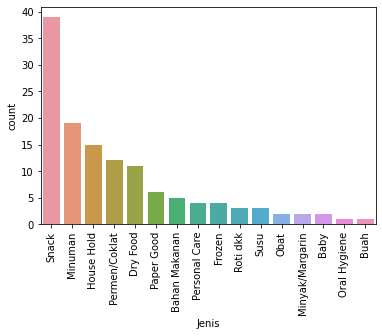

In [12]:
sns.countplot(x = 'Jenis', data = df, order = df['Jenis'].value_counts().iloc[:].index)
plt.xticks(rotation=90)

#Melihat produk apa saja yang lebih banyak diminati

Mengelompokkan dataframe sesuai dan menampilkan jumlah item, lalu kami perlu menggabungkan item menjadi 1 transaksi per baris

In [13]:
df = df.groupby(['No transaksi','Jenis']).size().reset_index(name='count')
basket = (df.groupby(['No transaksi', 'Jenis'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('No transaksi'))
#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets.head()


Jenis,Baby,Bahan Makanan,Buah,Dry Food,Frozen,House Hold,Minuman,Minyak/Margarin,Obat,Oral Hygiene,Paper Good,Permen/Coklat,Personal Care,Roti dkk,Snack,Susu
No transaksi,,,,,,,,,,,,,,,,
201801000011,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
201801000012,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
201801000013,0,0,0,0,0,1,1,1,1,1,1,0,1,0,1,0
201801000014,0,1,0,1,0,1,1,1,1,0,0,0,0,0,1,1
201801000015,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1


In [94]:
basket_sets.to_csv("baskets_sets.csv") # Export data yang sudah melalui data Pre-Processing ke dalam format CSV

Setelah itu, kami akan menghasilkan set item yang sering dengan dukungan minimum setidaknya 1% karena ini adalah level dukungan yang lebih menguntungkan yang dapat menunjukkan lebih banyak hasil kepada kami.

In [17]:
#Menampilkan Kombinasi Produk 
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

# Catatan X antecendent dan y adalah consequent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Baby),(Dry Food),0.1,0.6,0.1,1.0,1.666667,0.04,inf
24523,"(Snack, Dry Food, Minuman, Roti dkk)","(Baby, House Hold, Permen/Coklat)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
24526,"(House Hold, Snack, Minuman, Roti dkk)","(Baby, Dry Food, Permen/Coklat)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
24527,"(Snack, Permen/Coklat, Minuman, Roti dkk)","(Baby, House Hold, Dry Food)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
24528,"(Baby, House Hold, Dry Food, Permen/Coklat)","(Snack, Minuman, Roti dkk)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
24529,"(Baby, House Hold, Dry Food, Roti dkk)","(Snack, Permen/Coklat, Minuman)",0.1,0.4,0.1,1.0,2.500000,0.06,inf
24530,"(Baby, House Hold, Snack, Dry Food)","(Permen/Coklat, Minuman, Roti dkk)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
13401,"(Baby, Frozen)","(Paper Good, House Hold, Dry Food, Permen/Coklat)",0.1,0.2,0.1,1.0,5.000000,0.08,inf
13400,"(Baby, Permen/Coklat)","(Frozen, Paper Good, House Hold, Dry Food)",0.1,0.2,0.1,1.0,5.000000,0.08,inf
13399,"(Baby, House Hold)","(Paper Good, Frozen, Dry Food, Permen/Coklat)",0.1,0.2,0.1,1.0,5.000000,0.08,inf
